<a href="https://colab.research.google.com/github/ed-roberts-github/Previous-work/blob/main/upper_confidence_bound(UCB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 

## Importing the dataset

UCB is a dynamic process that happens in real time, the data give here is obvs static so need to make a simulation. So the data is in the format of rows showing what adds the user would (1) and wouldn't click (0).

In [28]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


## Implementing UCB

In [29]:
d = 10                          #number of adds
N = 10000                       #number of people
ads_selected = []               #list of selected ad over rounds
numbers_of_selections = [0] * d #number of times each add is selected, initalised with 10 0s
sums_of_rewards = [0] * d       #sum of rewards of each add 
total_reward = 0

for n in range(0, N):
  ad = 0 
  max_upper_bound = 0 #max of upper confidence bound
  for i in range(0,d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] /numbers_of_selections[i]
      delta_i = math.sqrt(3 * math.log(n+1) / (2 * numbers_of_selections[i]))
      upper_bound = average_reward + delta_i
    
    else:
      #making sure all ads are selected in first N rounds
      #do this by making upper_bound large
      upper_bound = 1e400

    #checking to see if this ad has highest bound so far
    if (max_upper_bound < upper_bound):
      max_upper_bound = upper_bound
      ad = i

  #chaning the variables as required
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n,ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward #adding the reward to selected ad from reward from dataset
  total_reward = total_reward = reward


## Visualising the results

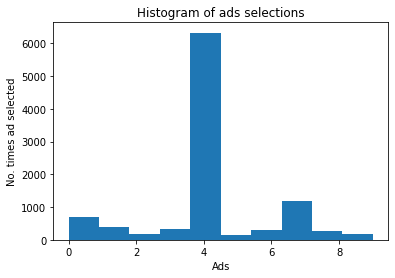

In [30]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel('No. times ad selected')
plt.show()